In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
#f = r.TFile("./data/results_4D_PDF_May13.root")
f = r.TFile("./data/results_4D_PDF_May15.root")

In [3]:
parsUnscaled = []
parNames = ["rmin", "rmax", "rbins", "vmin", "vmax", "vbins", "thetamin", "thetamax", "thetabins", "haddcounter"]
for pari in parNames:
    try:
        parsUnscaled.append( f.Get(pari).GetVal() )
    except:
        print(pari)
print(parsUnscaled)

[1060050.0, 1073550.0, 3150.0, -6750.0, 6750.0, 3150.0, 0.0, 942.4785766601562, 9450.0, 150.0]


In [4]:
pars = []
for pari in parsUnscaled:
    pars.append( pari/parsUnscaled[len(parsUnscaled)-1])
print(pars)

[7067.0, 7157.0, 21.0, -45.0, 45.0, 21.0, 0.0, 6.283190511067708, 63.0, 1.0]


In [9]:
rbins = int(pars[2])
vbins = int(pars[5])
thetabins = int(pars[8])

In [10]:
Elow = 1700
Ehigh = 3500

---

### Lets start by just creating a plot of all the decay positrons for all energies

We can do this by just getting all entries in these histograms

In [14]:
#PDF_AllEnergies.SetDirectory(0)

bins = []

for rbin in range(rbins):
    vbinsi = []
    print("rbin", rbin)
    for vbin in range(vbins):
        thetabini = []
        print("   vbin", vbin)
        f = r.TFile("./data/results_4D_PDF_May15.root")
        for thetabin in range(thetabins):
            binstring = str(rbin).zfill(3)+"_"+str(vbin).zfill(3)+"_"+str(thetabin).zfill(3)
            #positrons = f.Get("he_"+binstring).GetEntries()
            h = f.Get("he_"+binstring).ProjectionX()
            bin1 = h.FindBin(Elow)
            bin2 = h.FindBin(Ehigh)
            deltaBin = bin2-bin1
            positrons = h.Integral(bin1,bin2)
            #if(positrons > 0):
            #    print(binstring)
            #    print("    Bin Contents:", positrons)
            #bins.append((rbin + 1, vbin + 1, thetabin + 1, positrons))
            thetabini.append(positrons)
            #PDF_AllEnergies.SetBinContent(rbin + 1, vbin + 1, thetabin + 1, positrons)
        vbinsi.append(thetabini)
        f.Close()
    bins.append(vbinsi)

rbin 0
   vbin 0
   vbin 1
   vbin 2
   vbin 3
   vbin 4
   vbin 5
   vbin 6
   vbin 7
   vbin 8
   vbin 9
   vbin 10
   vbin 11
   vbin 12
   vbin 13
   vbin 14
   vbin 15
   vbin 16
   vbin 17
   vbin 18
   vbin 19
   vbin 20
rbin 1
   vbin 0
   vbin 1
   vbin 2
   vbin 3
   vbin 4
   vbin 5
   vbin 6
   vbin 7
   vbin 8
   vbin 9
   vbin 10
   vbin 11
   vbin 12
   vbin 13
   vbin 14
   vbin 15
   vbin 16
   vbin 17
   vbin 18
   vbin 19
   vbin 20
rbin 2
   vbin 0
   vbin 1
   vbin 2
   vbin 3
   vbin 4
   vbin 5
   vbin 6
   vbin 7
   vbin 8
   vbin 9
   vbin 10
   vbin 11
   vbin 12
   vbin 13
   vbin 14
   vbin 15
   vbin 16
   vbin 17
   vbin 18
   vbin 19
   vbin 20
rbin 3
   vbin 0
   vbin 1
   vbin 2
   vbin 3
   vbin 4
   vbin 5
   vbin 6
   vbin 7
   vbin 8
   vbin 9
   vbin 10
   vbin 11
   vbin 12
   vbin 13
   vbin 14
   vbin 15
   vbin 16
   vbin 17
   vbin 18
   vbin 19
   vbin 20
rbin 4
   vbin 0
   vbin 1
   vbin 2
   vbin 3
   vbin 4
   vbin 5
   vbin 6
   vbin 7
 

In [15]:
print(bins)

[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [5.0, 6.0, 0.0, 4.0, 3.0, 1.0, 2.0, 1.0, 2.0, 0.0, 3.0, 0.0, 2.0, 0.0, 4.0, 2.0, 1.0, 2.0, 2.0, 1.0, 3.0, 2.0, 1.0, 0.0, 0.0, 1.0, 6.0, 1.0, 2.0, 1.0, 3.0, 1.0, 5.0, 4.0, 2.0, 0.0, 1.0, 0.0, 6.0, 2.0, 0.0, 6.0, 4.0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 6.0, 5.0, 1.0, 1.0, 2.0, 1.0, 0.0], [5.0, 6.0, 4.0, 3.0, 7.0, 1.0, 4.0, 8.0, 3.0, 3.0, 6.0, 3.0, 4.0, 4.0, 2.0, 5.0, 4.0, 6.0, 3.0, 8.0, 4.0, 2.0, 6.0, 11.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 0.0, 3.0, 7.0, 8.0, 4.0, 5.0, 3.0, 4.0, 2.0, 2.0, 10.0, 7.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 5.0, 3.0, 7.0, 0.0, 7.0, 5.0, 4.0, 3.0, 4.0, 7.0, 3.0, 8.0, 7.0], [2.0, 6.0, 11.0, 6.0, 10.0, 7.0, 7.0, 7.0, 6.

In [16]:
PDF_AllEnergies = r.TH3D("PDF_AllEnergies","Probability of All Energies; r [mm]; y [mm]; #theta [rad]",
                         int(pars[2]),pars[0],pars[1], #r
                         int(pars[5]),pars[3],pars[4], #v
                         int(pars[8]),pars[6],pars[7]  #theta
                        )

for rbin in range(rbins):
    print("rbin", rbin)
    for vbin in range(vbins):
        print("   vbin", vbin)
        for thetabin in range(thetabins):
            positrons = bins[rbin][vbin][thetabin]
            PDF_AllEnergies.SetBinContent(rbin + 1, vbin + 1, thetabin + 1, positrons)

rbin 0
   vbin 0
   vbin 1
   vbin 2
   vbin 3
   vbin 4
   vbin 5
   vbin 6
   vbin 7
   vbin 8
   vbin 9
   vbin 10
   vbin 11
   vbin 12
   vbin 13
   vbin 14
   vbin 15
   vbin 16
   vbin 17
   vbin 18
   vbin 19
   vbin 20
rbin 1
   vbin 0
   vbin 1
   vbin 2
   vbin 3
   vbin 4
   vbin 5
   vbin 6
   vbin 7
   vbin 8
   vbin 9
   vbin 10
   vbin 11
   vbin 12
   vbin 13
   vbin 14
   vbin 15
   vbin 16
   vbin 17
   vbin 18
   vbin 19
   vbin 20
rbin 2
   vbin 0
   vbin 1
   vbin 2
   vbin 3
   vbin 4
   vbin 5
   vbin 6
   vbin 7
   vbin 8
   vbin 9
   vbin 10
   vbin 11
   vbin 12
   vbin 13
   vbin 14
   vbin 15
   vbin 16
   vbin 17
   vbin 18
   vbin 19
   vbin 20
rbin 3
   vbin 0
   vbin 1
   vbin 2
   vbin 3
   vbin 4
   vbin 5
   vbin 6
   vbin 7
   vbin 8
   vbin 9
   vbin 10
   vbin 11
   vbin 12
   vbin 13
   vbin 14
   vbin 15
   vbin 16
   vbin 17
   vbin 18
   vbin 19
   vbin 20
rbin 4
   vbin 0
   vbin 1
   vbin 2
   vbin 3
   vbin 4
   vbin 5
   vbin 6
   vbin 7
 

Info in <TCanvas::SaveAs>: ROOT file ding.root has been created


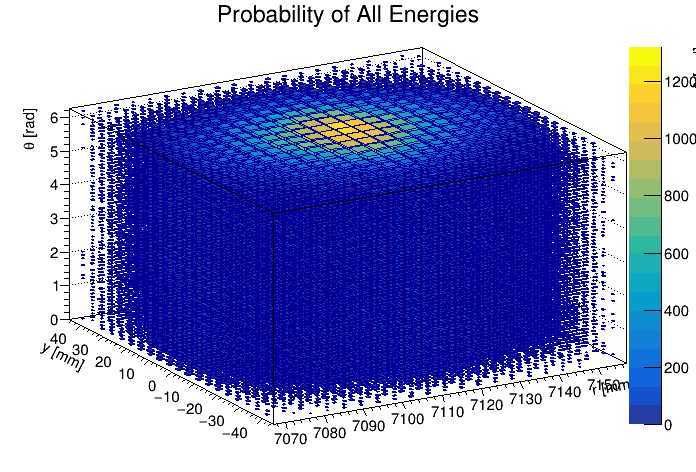

In [17]:
c = r.TCanvas("c","c",700,500)
PDF_AllEnergies.Draw("lego2z")
c.Draw()
c.Print("ding.root")

---

### Now lets scale this by the number of muons

In [15]:
muCountHist = f.Get("muCountHist").Clone()

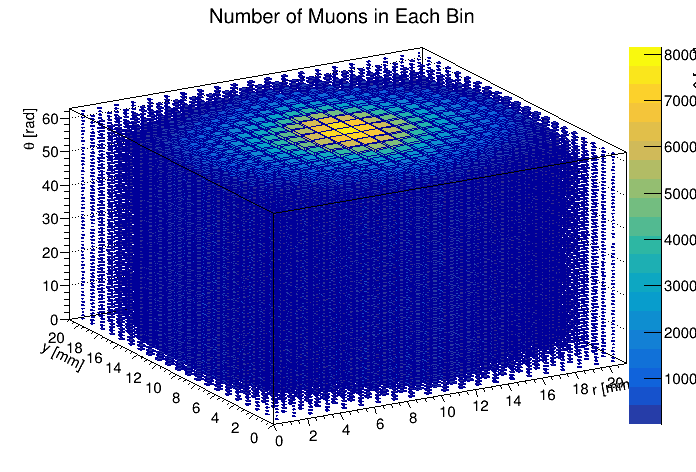

In [16]:
c = r.TCanvas()
muCountHist.Draw("lego2 colz")
c.Draw()

In [17]:
scaledMuonDist = PDF_AllEnergies.Clone("scaledMuonDist")
scaledMuonDist.GetZaxis().UnZoom()

In [18]:
for rbin in range(rbins):
    print("starting:", rbin)
    for vbin in range(vbins):
        for thetabin in range(thetabins):
            muons = muCountHist.GetBinContent(rbin+1,vbin+1,thetabin+1)
            positrons = scaledMuonDist.GetBinContent(rbin+1,vbin+1,thetabin+1)
            if(muons > 0):
                scaled = positrons / muons
            else:
                scaled = 0
            scaledMuonDist.SetBinContent(rbin+1,vbin+1,thetabin+1, scaled)

starting: 0
starting: 1
starting: 2
starting: 3
starting: 4
starting: 5
starting: 6
starting: 7
starting: 8
starting: 9
starting: 10
starting: 11
starting: 12
starting: 13
starting: 14
starting: 15
starting: 16
starting: 17
starting: 18
starting: 19
starting: 20


In [19]:
print(scaledMuonDist,PDF_AllEnergies)

<ROOT.TH3D object ("scaledMuonDist") at 0x7f44adbd83f0> <ROOT.TH3D object ("PDF_AllEnergies") at 0x7f44adbea230>


Info in <TCanvas::SaveAs>: ROOT file ./data/PDF_AllCalos_1700_3500_3D.root has been created


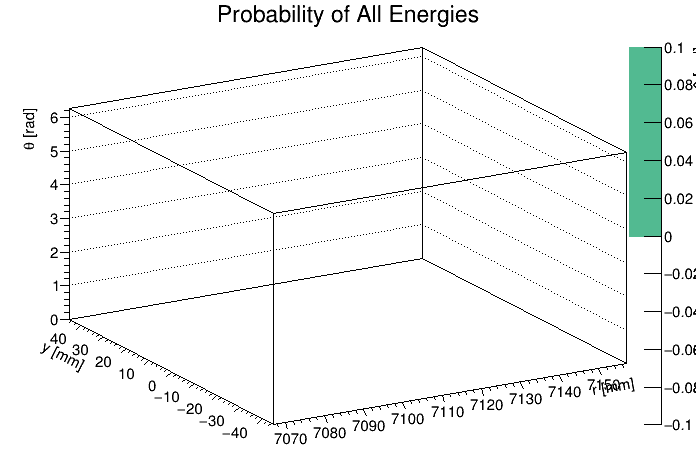

In [20]:
c = r.TCanvas()
scaledMuonDist.Draw("lego2z")
c.Draw()
c.Print("./data/PDF_AllCalos_1700_3500_3D.root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


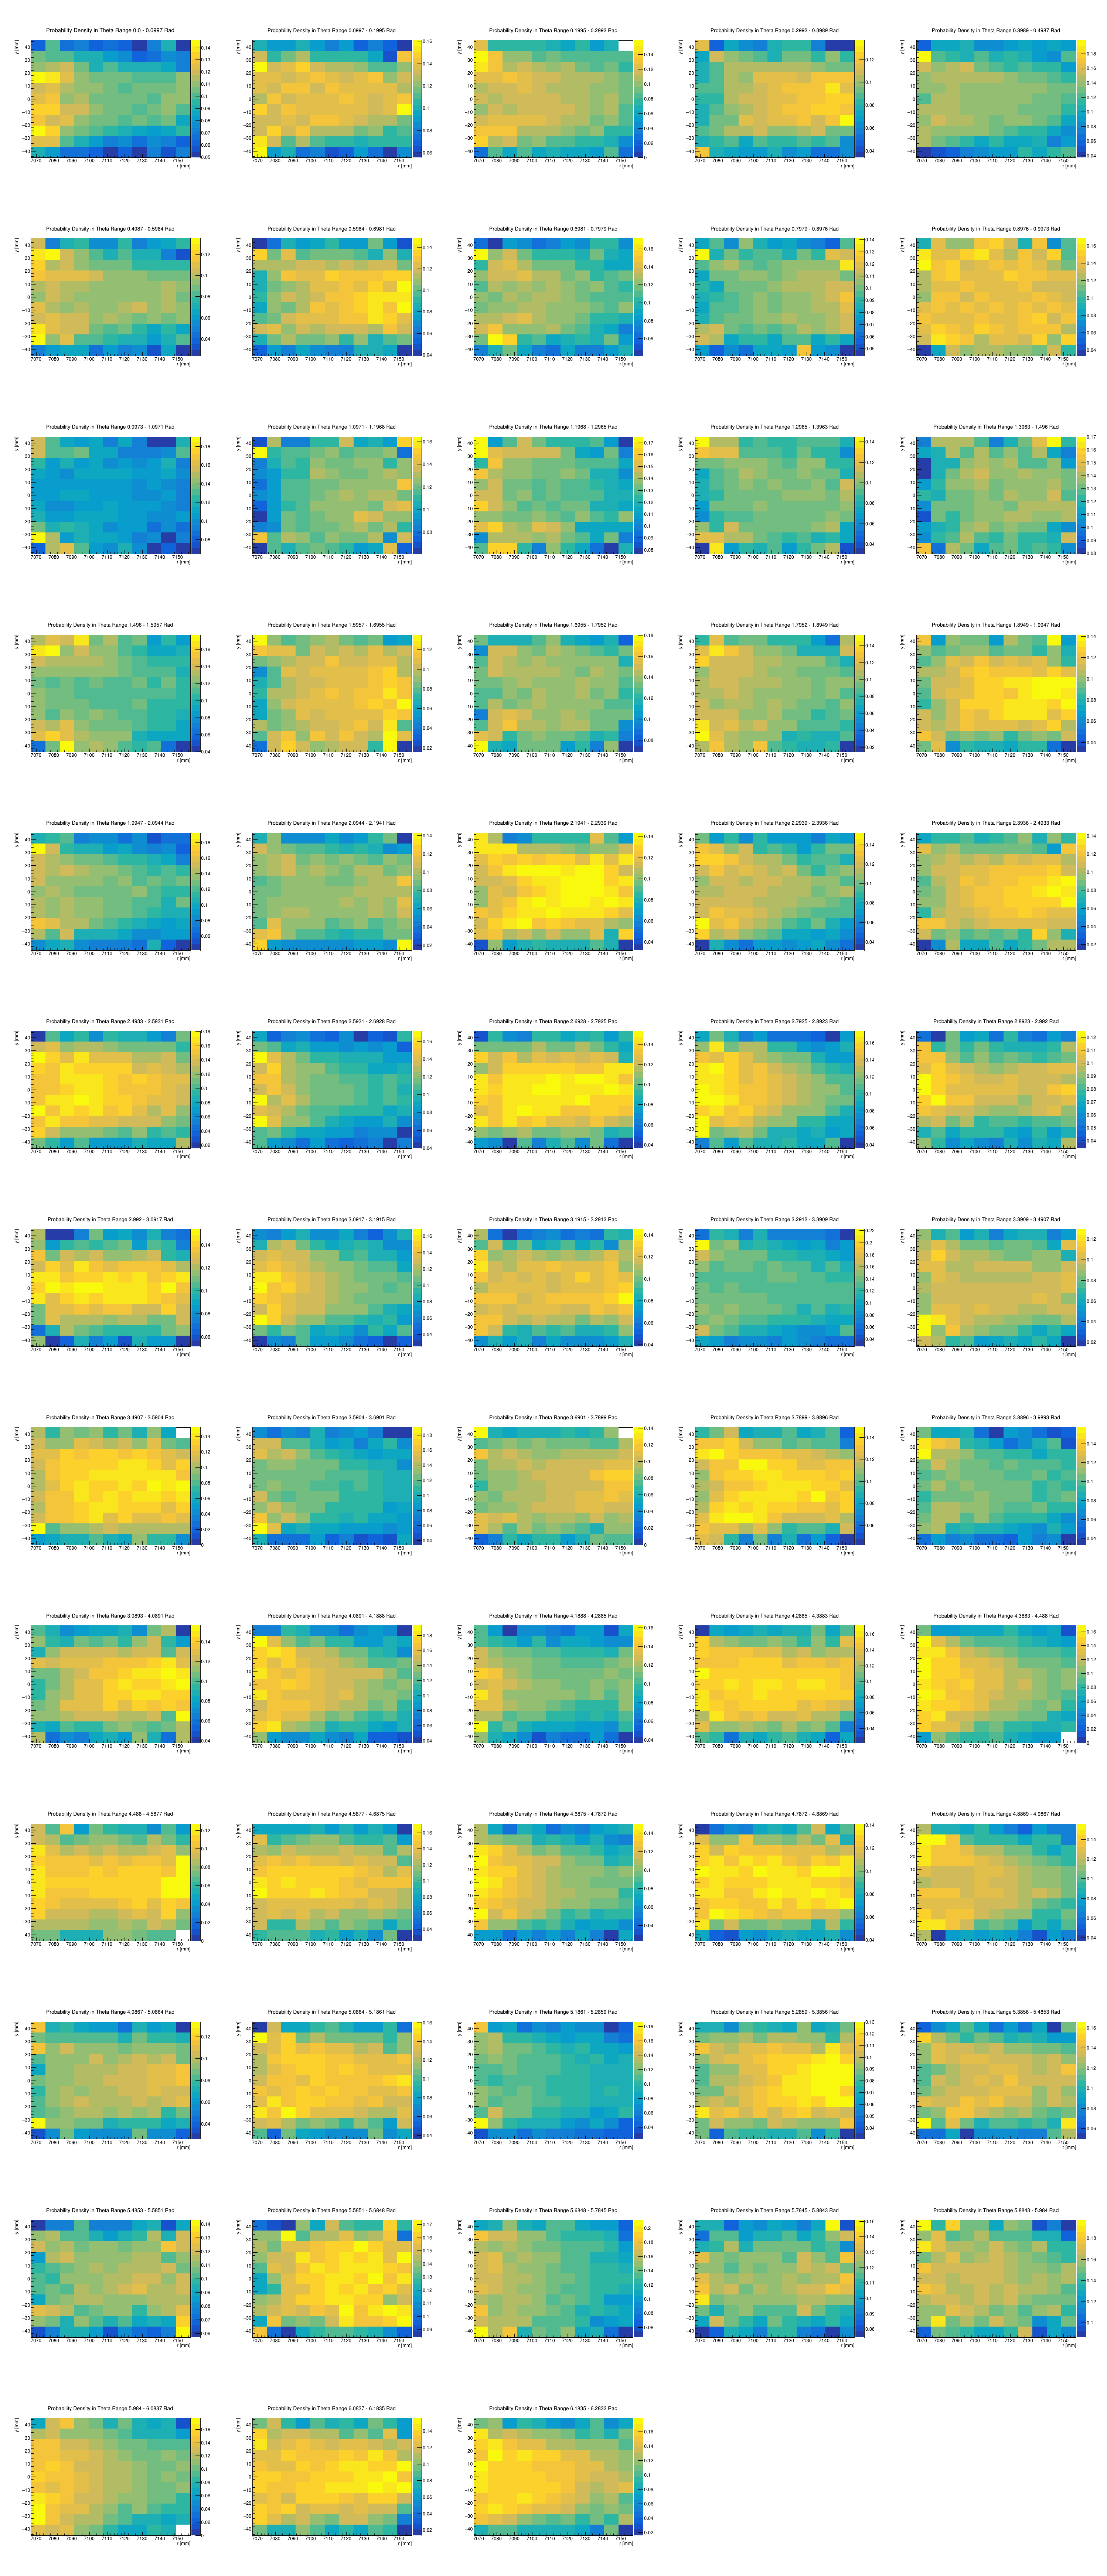

In [17]:
nbins = scaledMuonDist.GetZaxis().GetNbins()
cols = 5
c = r.TCanvas("c","c",3000,7000)
c.Divide(cols,int(np.ceil(nbins/cols)))

histVec = []
for i in range(nbins):
    c.cd(i+1)
    scaledMuonDist.GetZaxis().SetRange(i+1,i+1)
    hi = scaledMuonDist.Project3D("yx").Clone("h"+str(i))
    #hi.GetZaxis().SetRangeUser(0.1,0.5)
    thetastep = (pars[7] - pars[6])/(pars[8])
    thetamin = pars[6] + i*thetastep
    thetamax = pars[6] + (i+1)*thetastep
    hi.SetTitle("Probability Density in Theta Range \n"+str(round(thetamin,4))+" - "+str(round(thetamax,4))+" Rad")
    
    histVec.append(hi.Clone())
    histVec[i].Draw("colz")
    #r.gPad.SetLogz()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./images/PDF_000.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_001.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_002.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_003.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_004.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_005.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_006.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_007.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_008.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_009.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_010.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_011.png has been created
Info in <TCanvas::Print>: png file ./images/PDF_012.png

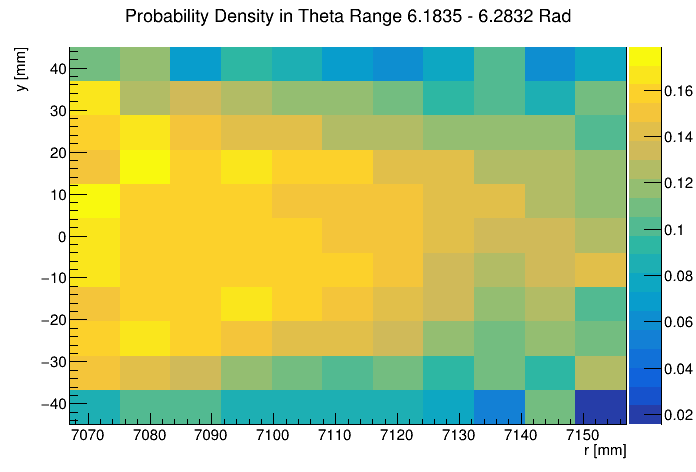

In [18]:
c = r.TCanvas("c","c",700,500)

histVec = []
for i in range(nbins):
    c.cd(i+1)
    scaledMuonDist.GetZaxis().SetRange(i+1,i+1)
    hi = scaledMuonDist.Project3D("yx").Clone("h"+str(i))
    #hi.GetZaxis().SetRangeUser(0.1,0.5)
    thetastep = (pars[7] - pars[6])/(pars[8])
    thetamin = pars[6] + i*thetastep
    thetamax = pars[6] + (i+1)*thetastep
    hi.SetTitle("Probability Density in Theta Range \n"+str(round(thetamin,4))+" - "+str(round(thetamax,4))+" Rad")
    
    histVec.append(hi.Clone())
    histVec[i].Draw("colz")
    #r.gPad.SetLogz()
    c.Draw()
    c.Print("./images/PDF_"+str(i).zfill(3)+".png")

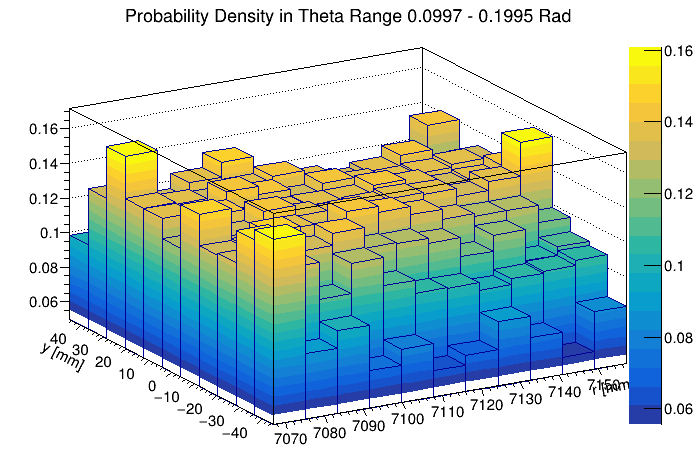

In [19]:
c = r.TCanvas()
histVec[1].Draw("lego2z")
c.Draw()